In [1]:
import fastf1 as ff1
from fastf1 import plotting
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize



from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

In [2]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

# Ignoramos los Warning
pd.options.mode.chained_assignment = None 

In [3]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
qualy = 'Q'
driver1 = input('Piloto 1: ')
driver2 = input('Piloto 2: ')

Año: 2022
Round: 22
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: NOR
Piloto 2: PER


In [4]:
## Cargar la carrera y clasificación
race = ff1.get_session(year, wknd, ses)
quali = ff1.get_session(year, wknd, qualy)

In [5]:
# Get the laps
laps_r = race.load(telemetry=True)
laps_q = quali.load(telemetry=True)

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '55', '63', '4', '31', '18', '3', '5', '22', '24', '23', '10', '77', '47', '20', '44', '6', '14']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for t

In [6]:
fastest_lap = race.laps.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Piloto: ',fastest_lap['Driver'])

Vuelta más rápida:  0 days 00:01:28.391000
Tipo de neumático:  MEDIUM
Piloto:  NOR


In [7]:
fastest_lap

Time                      0 days 02:09:55.083000
DriverNumber                                   4
LapTime                   0 days 00:01:28.391000
LapNumber                                     44
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:17.916000
Sector2Time               0 days 00:00:38.308000
Sector3Time               0 days 00:00:32.167000
Sector1SessionTime        0 days 02:08:44.608000
Sector2SessionTime        0 days 02:09:22.916000
Sector3SessionTime        0 days 02:09:55.083000
SpeedI1                                    277.0
SpeedI2                                    291.0
SpeedFL                                    215.0
SpeedST                                    291.0
IsPersonalBest                              True
Compound                                  MEDIUM
TyreLife                                     2.0
FreshTyre           

In [8]:
tm = race.get_driver(driver1).TeamName
tm = tm.lower().replace(" ", "")

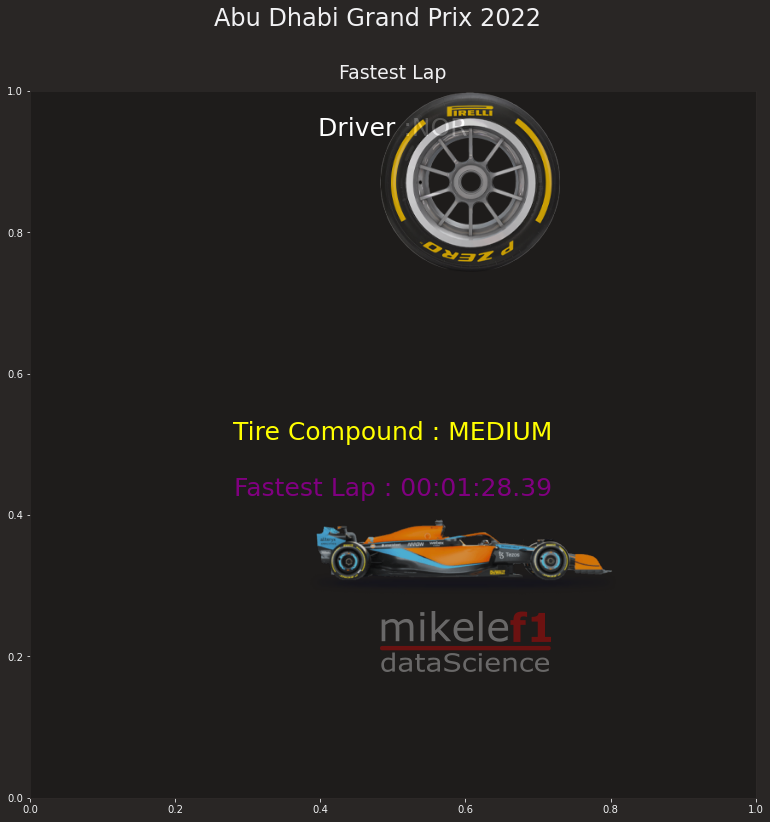

In [12]:
import matplotlib
import matplotlib.pyplot as plt


with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

car = image.imread('./images/'+tm+'.png')
res = resize(car, (97, 329))

fig = plt.figure()
ax = fig.add_subplot()
#fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
if ses == 'Q':
    ax.set_title('Pole Position')
else :
    ax.set_title('Fastest Lap')

plt.rcParams['figure.figsize'] = [13, 13]

plt.suptitle(f"{race.event['EventName']} {race.event.year} \n"
             , size=24, y=0.97)

ax.text(0.50, 0.50, 'Tire Compound : '+fastest_lap['Compound'] ,
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='yellow', fontsize=25)

ax.text(0.50, 0.42, 'Fastest Lap :' + str(fastest_lap['LapTime'])[6:18],
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='purple', fontsize=25)

ax.text(0.50, 0.93, 'Driver :' + fastest_lap['Driver'],
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=25)

#ax.plot([2], [1], 'o')
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
#            arrowprops=dict(facecolor='black', shrink=0.05))

tire = image.imread('./images/yellow.png')
tire = resize(tire, (180, 180))
fig.figimage(tire, xo=380, yo=550, origin='upper', alpha=.80)

fig.figimage(im, xo=380, yo=150, zorder=13, alpha=.35)
fig.figimage(res, xo=300, yo=220, origin='upper', alpha=.80)

nombrearchivo = str(year)+'-'+str(wknd)+'-Pole-Q-'+fastest_lap['Driver']+'.png'
plt.savefig(nombrearchivo)


plt.show()

In [11]:
laps_drive1 = race.laps.pick_driver(driver1)
laps_drive2 = race.laps.pick_driver(driver2)

In [12]:
laps_drive1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
17,0 days 00:16:54.660000,11,NaT,1,1,0 days 00:15:02.020000,NaT,NaT,0 days 00:00:46.217000,0 days 00:00:43.525000,...,False,SOFT,1.0,True,0 days 00:15:02.020000,Red Bull Racing,PER,1,False,2022-11-19 14:04:31.172
18,0 days 00:18:19.480000,11,0 days 00:01:24.820000,2,1,NaT,NaT,0 days 00:00:17.437000,0 days 00:00:36.442000,0 days 00:00:30.941000,...,False,SOFT,2.0,True,0 days 00:16:54.660000,Red Bull Racing,PER,1,True,2022-11-19 14:06:23.812
19,0 days 00:20:19.085000,11,0 days 00:01:59.605000,3,2,NaT,0 days 00:20:17.697000,0 days 00:00:23.788000,0 days 00:00:51.154000,0 days 00:00:44.663000,...,False,SOFT,1.0,True,0 days 00:18:19.480000,Red Bull Racing,PER,2,False,2022-11-19 14:07:48.632
20,0 days 00:28:05.257000,11,NaT,4,2,0 days 00:24:59.939000,NaT,NaT,0 days 00:00:54.892000,0 days 00:01:31.214000,...,False,SOFT,5.0,False,0 days 00:20:19.085000,Red Bull Racing,PER,1,False,2022-11-19 14:09:48.237
21,0 days 00:29:30.227000,11,0 days 00:01:24.970000,5,2,NaT,NaT,0 days 00:00:17.772000,0 days 00:00:36.248000,0 days 00:00:30.950000,...,False,SOFT,6.0,False,0 days 00:28:05.257000,Red Bull Racing,PER,1,True,2022-11-19 14:17:34.409
22,0 days 00:31:25.814000,11,0 days 00:01:55.587000,6,3,NaT,0 days 00:31:24.613000,0 days 00:00:23.633000,0 days 00:00:46.823000,0 days 00:00:45.131000,...,False,SOFT,4.0,False,0 days 00:29:30.227000,Red Bull Racing,PER,1,False,2022-11-19 14:18:59.379
23,0 days 00:41:10.316000,11,NaT,7,3,0 days 00:39:02.477000,NaT,NaT,0 days 00:00:54.154000,0 days 00:00:48.505000,...,False,SOFT,2.0,True,0 days 00:31:25.814000,Red Bull Racing,PER,1,False,2022-11-19 14:20:54.966
24,0 days 00:42:34.735000,11,0 days 00:01:24.419000,8,3,NaT,NaT,0 days 00:00:17.414000,0 days 00:00:36.027000,0 days 00:00:30.978000,...,False,SOFT,3.0,True,0 days 00:41:10.316000,Red Bull Racing,PER,1,True,2022-11-19 14:30:39.468
25,0 days 00:44:26.710000,11,0 days 00:01:51.975000,9,4,NaT,0 days 00:44:25.582000,0 days 00:00:23.446000,0 days 00:00:45.482000,0 days 00:00:43.047000,...,False,SOFT,1.0,True,0 days 00:42:34.735000,Red Bull Racing,PER,1,False,2022-11-19 14:32:03.887
26,0 days 00:49:33.670000,11,NaT,10,4,0 days 00:47:15.441000,NaT,NaT,0 days 00:00:59.896000,0 days 00:00:53.303000,...,False,SOFT,5.0,False,0 days 00:44:26.710000,Red Bull Racing,PER,1,False,2022-11-19 14:33:55.862


In [13]:
laps_drive2

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:17:36.950000,1,NaT,1,1,0 days 00:15:28.695000,NaT,NaT,0 days 00:00:56.455000,0 days 00:00:46.916000,...,False,SOFT,1.0,True,0 days 00:15:28.695000,Red Bull Racing,VER,1,False,2022-11-19 14:04:57.847
1,0 days 00:19:01.704000,1,0 days 00:01:24.754000,2,1,NaT,NaT,0 days 00:00:17.354000,0 days 00:00:36.456000,0 days 00:00:30.944000,...,False,SOFT,2.0,True,0 days 00:17:36.950000,Red Bull Racing,VER,1,True,2022-11-19 14:07:06.102
2,0 days 00:20:53.787000,1,0 days 00:01:52.083000,3,2,NaT,0 days 00:20:52.684000,0 days 00:00:25.756000,0 days 00:00:45.865000,0 days 00:00:40.462000,...,False,SOFT,1.0,True,0 days 00:19:01.704000,Red Bull Racing,VER,2,False,2022-11-19 14:08:30.856
3,0 days 00:27:39.159000,1,NaT,4,2,0 days 00:24:41.559000,NaT,NaT,0 days 00:00:58.121000,0 days 00:01:28.942000,...,False,SOFT,5.0,False,0 days 00:20:53.787000,Red Bull Racing,VER,1,False,2022-11-19 14:10:22.939
4,0 days 00:29:28.687000,1,0 days 00:01:49.528000,5,3,NaT,0 days 00:29:27.502000,0 days 00:00:21.828000,0 days 00:00:45.618000,0 days 00:00:42.082000,...,False,SOFT,4.0,False,0 days 00:27:39.159000,Red Bull Racing,VER,1,False,2022-11-19 14:17:08.311
5,0 days 00:41:05.934000,1,NaT,6,3,0 days 00:38:59.716000,NaT,NaT,0 days 00:00:54.253000,0 days 00:00:47.052000,...,False,SOFT,2.0,True,0 days 00:29:28.687000,Red Bull Racing,VER,1,False,2022-11-19 14:18:57.839
6,0 days 00:42:30.796000,1,0 days 00:01:24.862000,7,3,NaT,NaT,0 days 00:00:17.406000,0 days 00:00:36.429000,0 days 00:00:31.027000,...,False,SOFT,3.0,True,0 days 00:41:05.934000,Red Bull Racing,VER,1,True,2022-11-19 14:30:35.086
7,0 days 00:44:19.794000,1,0 days 00:01:48.998000,8,4,NaT,0 days 00:44:18.668000,0 days 00:00:21.766000,0 days 00:00:46.133000,0 days 00:00:41.099000,...,False,SOFT,1.0,True,0 days 00:42:30.796000,Red Bull Racing,VER,1,False,2022-11-19 14:31:59.948
8,0 days 00:49:30.259000,1,NaT,9,4,0 days 00:47:11.581000,NaT,NaT,0 days 00:00:56.962000,0 days 00:00:55.154000,...,False,SOFT,5.0,False,0 days 00:44:19.794000,Red Bull Racing,VER,1,False,2022-11-19 14:33:48.946
9,0 days 00:50:54.881000,1,0 days 00:01:24.622000,10,4,NaT,NaT,0 days 00:00:17.398000,0 days 00:00:36.433000,0 days 00:00:30.791000,...,False,SOFT,6.0,False,0 days 00:49:30.259000,Red Bull Racing,VER,1,True,2022-11-19 14:38:59.411


In [14]:
print(laps_drive1['LapNumber'].max())
print(laps_drive2['LapNumber'].max())

18
17


In [15]:
piloto1 = race.get_driver(driver1)
piloto2 = race.get_driver(driver2)

In [16]:
d1_team = pd.unique(laps_drive1['Team'])
print(d1_team)

['Red Bull Racing']


In [17]:
color1 = ff1.plotting.driver_color(driver1)
color2 = ff1.plotting.driver_color(driver2)
#Si el gráfico es similar se pone otro color Blanco
#color2 = '#FFFFFF'

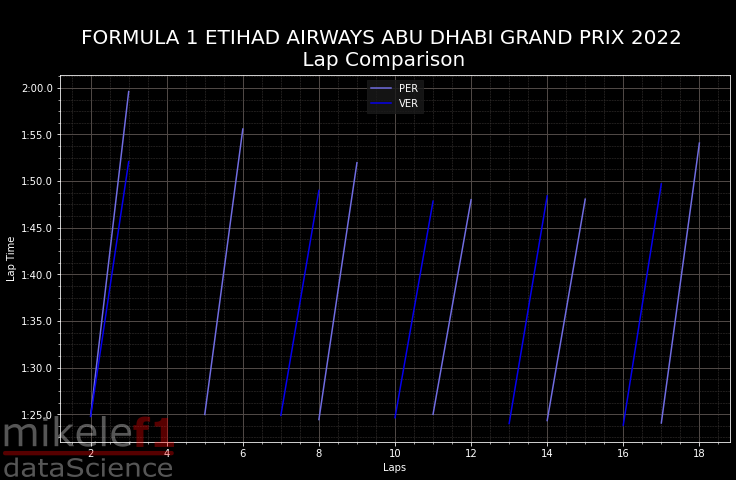

In [18]:
plt.rcParams['figure.figsize'] = [12, 12]
#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

#Modo oscuro
plt.style.use('dark_background')


fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]


plt.suptitle(f"\n{race.event['OfficialEventName']} \n Lap Comparison \n"
             , size=20, y=1.02)

#fig, ax = plt.subplots()
#plt.suptitle(f"Lap Comparison \n "
#             f"{race.event['EventName']} {race.event.year} Race \n")
#             f"{piloto1['FullName']} &  {piloto2['FullName']} \n")

ax.plot(laps_drive1['LapNumber'], laps_drive1['LapTime'], color = color1,  label=piloto1['Abbreviation'])
ax.plot(laps_drive2['LapNumber'], laps_drive2['LapTime'], color = color2 , label=piloto2['Abbreviation'])
ax.set(ylabel='Lap Time', xlabel='Laps')
ax.legend(loc="upper center")

fig.figimage(im, 3, 3, zorder=13, alpha=.35)

nombrearchivo = str(year)+'-'+str(wknd)+'-LC'+ses+'-'+driver1+'-'+driver2+'.png'
plt.savefig(nombrearchivo)
plt.show()